In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
rs = pd.read_csv('Real estate.csv')
rs.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [14]:
rs.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [15]:
rs.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28272\2471968956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = y_house.head(), y = y_house.head().index, palette = "Blues")


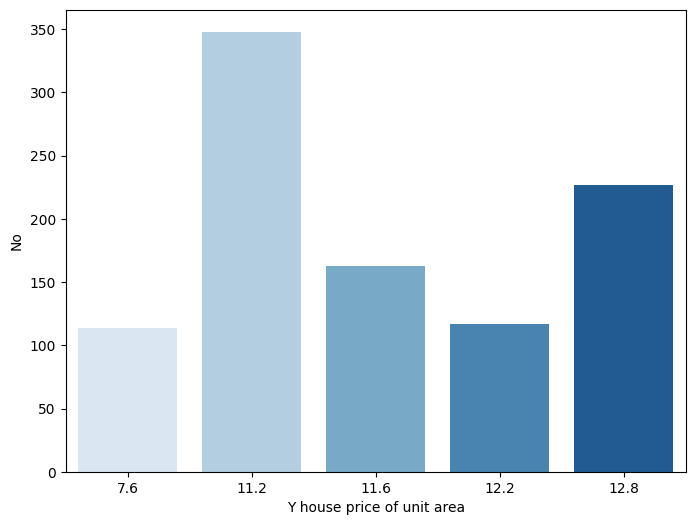

In [16]:
y_house = rs["Y house price of unit area"].groupby(rs.No).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x = y_house.head(), y = y_house.head().index, palette = "Blues")

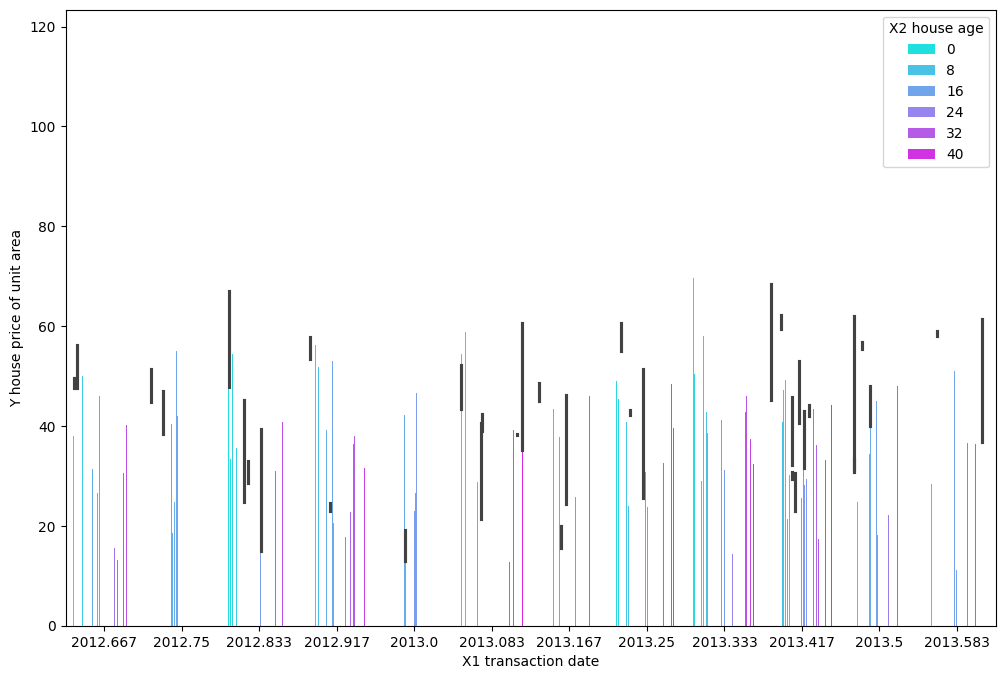

In [19]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='X1 transaction date', y='Y house price of unit area', hue='X2 house age', data=rs, palette='cool')

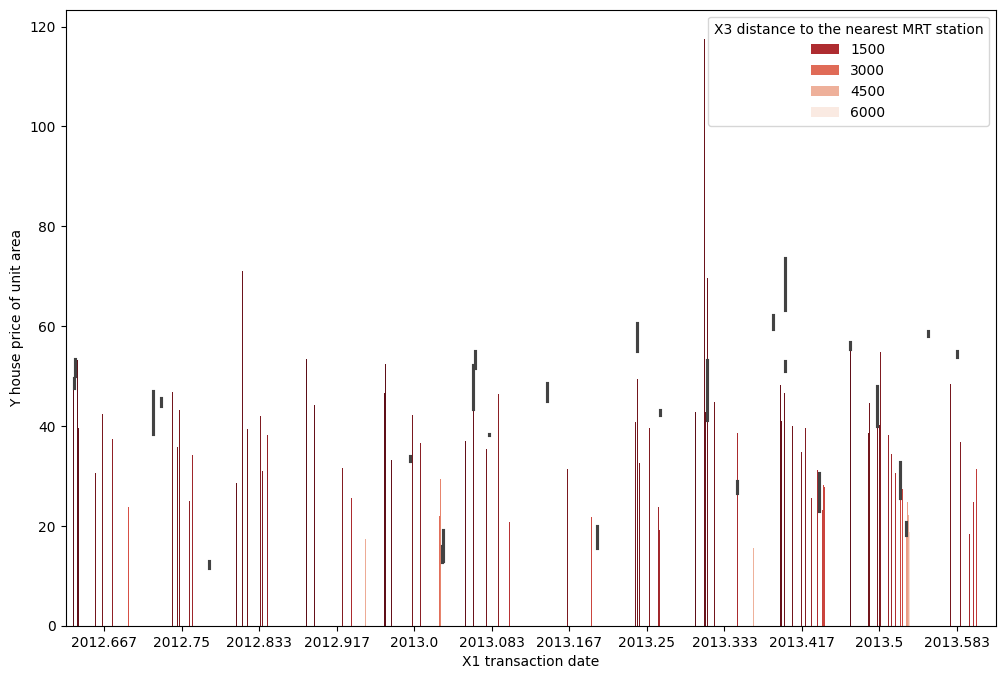

In [21]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='X1 transaction date', y='Y house price of unit area', hue='X3 distance to the nearest MRT station', data=rs, palette='Reds_r')

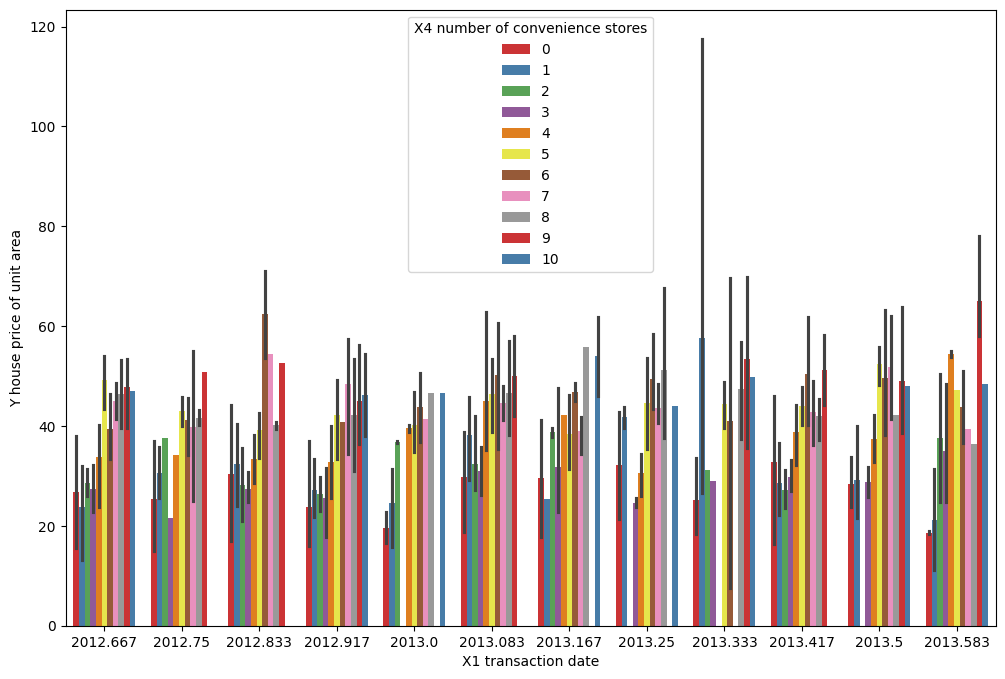

In [22]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='X1 transaction date', y='Y house price of unit area', hue='X4 number of convenience stores', data=rs, palette='Set1')

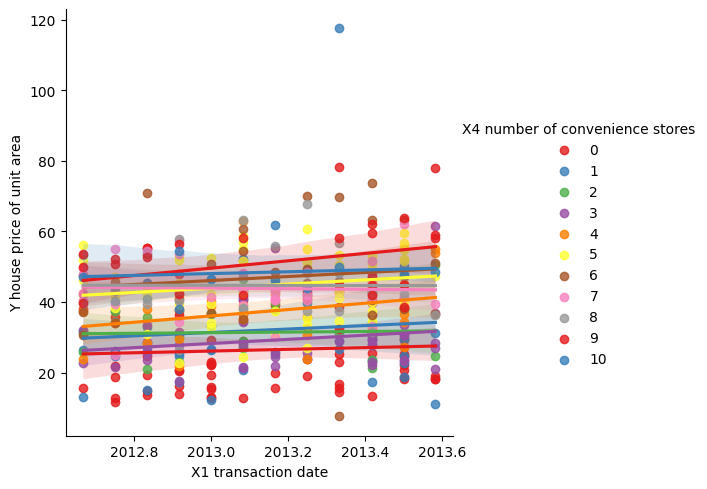

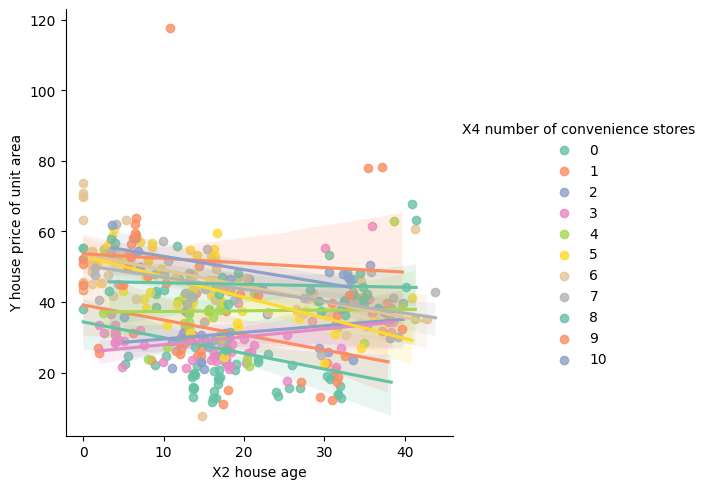

In [26]:
ax = sns.lmplot(x='X1 transaction date', y='Y house price of unit area', hue='X4 number of convenience stores', data=rs, palette='Set1')
ax = sns.lmplot(x='X2 house age', y='Y house price of unit area', hue='X4 number of convenience stores', data=rs, palette='Set2')

In [27]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [28]:
x = rs.drop(['Y house price of unit area'], axis = 1)
y = rs['Y house price of unit area']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

In [29]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred = linear_reg.predict(x_test)

In [31]:
R2 = metrics.r2_score(y_test, y_pred)
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 : {0:.3f}'.format(R2))
print('RMSE : {0:.3f}'.format(rmse))

R2 : 0.656
RMSE : 7.733


In [32]:
importance = linear_reg.coef_
variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
for i , v in zip(variables, importance):
    print('Feature: %s, Score : %.5f'% (i,v))

Feature: age, Score : -0.00446
Feature: sex, Score : 4.87352
Feature: bmi, Score : -0.26278
Feature: children, Score : -0.00452
Feature: smoker, Score : 1.08106
Feature: region, Score : 226.07761


In [35]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [42]:
x = rs.drop(['X3 distance to the nearest MRT station', 'No'], axis = 1)
y = rs['Y house price of unit area']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

In [43]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [44]:
y_pred = linear_reg.predict(x_test)

In [45]:
R2 = metrics.r2_score(y_test, y_pred)
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 : {0:.3f}'.format(R2))
print('RMSE : {0:.3f}'.format(rmse))

R2 : 1.000
RMSE : 0.000


In [46]:
importance = linear_reg.coef_
variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
for i , v in zip(variables, importance):
    print('Feature: %s, Score : %.5f'% (i,v))

Feature: age, Score : -0.00000
Feature: sex, Score : 0.00000
Feature: bmi, Score : -0.00000
Feature: children, Score : -0.00000
Feature: smoker, Score : -0.00000
Feature: region, Score : 1.00000
